# Pymaceuticals Inc.
---

### Analysis

- The total count of mice by gender is 124 female mice and 125 male mice.
- Capomulin has the maximum testing sample (230), while Zoniferol has the smallest sample (182).
- There is a correlation between mouse size and tumor size, mouse size increase also increases tumor size.
- From the selected samples, Capomulin and Ramicane seem to reduce the size of tumors better.
 

In [1]:
%matplotlib inline 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_study_mouse = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
merged_study_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [3]:
# Checking the number of mice.
len(merged_study_mouse["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_study_mouse.loc[merged_study_mouse.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data = merged_study_mouse.loc[merged_study_mouse["Mouse ID"] == "g989"]
dupe_data                      

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropping_duplicates = merged_study_mouse[merged_study_mouse["Mouse ID"].isin(duplicate_mouse_ids)== False] 
dropping_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
len(dropping_duplicates["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_statistics_DrugRegimen = merged_study_mouse.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_statistics_DrugRegimen["Tumor Volume (mm3)"].mean()
tumor_median = summary_statistics_DrugRegimen["Tumor Volume (mm3)"].median()
tumor_stdev = summary_statistics_DrugRegimen["Tumor Volume (mm3)"].std()
tumor_sem = summary_statistics_DrugRegimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_grouped_df = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median,
                                   "Standard Deviation": tumor_stdev, "SEM": tumor_sem})

summary_grouped_df.head()





,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summary_stat = merged_study_mouse.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_stat
# Using the aggregation method, produce the same summary statistics in a single line.




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

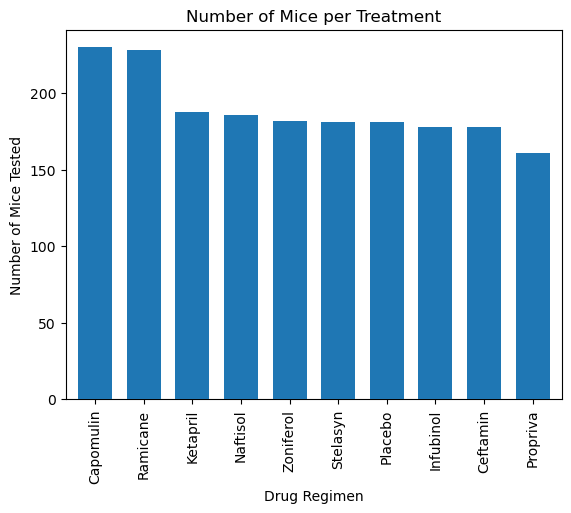

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#plotting a bar chart based on the amount of timepoints
bar_plot = merged_study_mouse["Drug Regimen"].value_counts().plot.bar(width=0.7, zorder=3)

#setting x and y labels 
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")
plt.show()


Text(0.5, 1.0, 'Number of Mice Tested per Treatment')

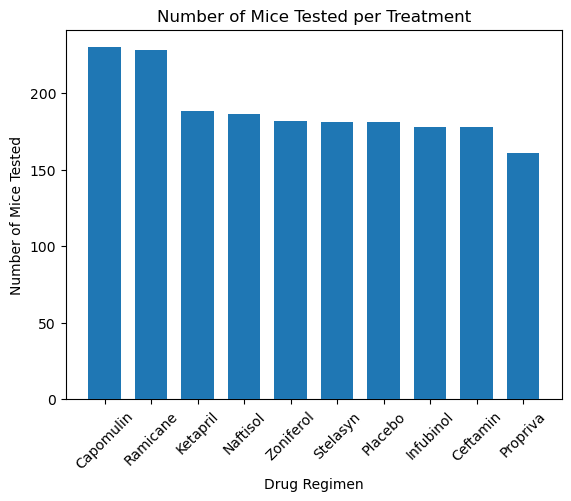

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = merged_study_mouse["Drug Regimen"].value_counts()

x_axis = counts.index.values

plt.bar(x_axis, counts, width = 0.7, zorder = 3)
plt.xticks(rotation = 45)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Treatment")


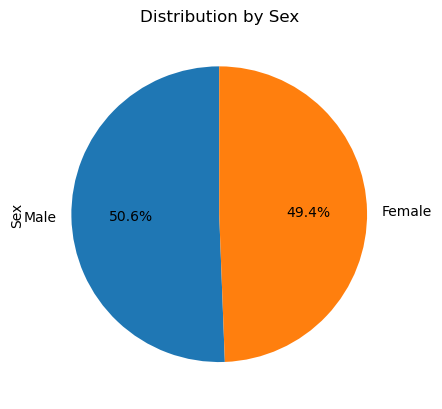

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieChart = merged_study_mouse["Sex"].value_counts()
pie_plt = pieChart.plot.pie(title="Distribution by Sex", autopct="%1.1f%%", startangle=90)


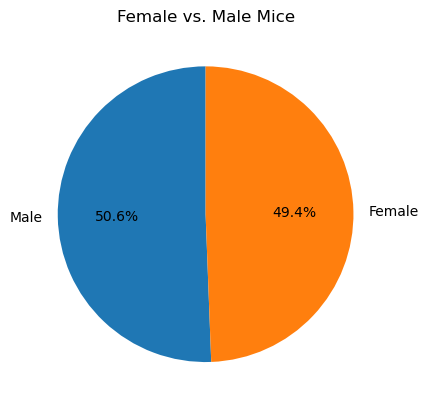

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pieChart = merged_study_mouse["Sex"].value_counts()
plt.pie(pieChart, labels=pieChart.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint = pd.DataFrame(merged_study_mouse.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index()
greatest_timepoint = greatest_timepoint.merge(merged_study_mouse, on = ["Mouse ID", "Timepoint"], how = "left" )
greatest_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,t573,0,Ceftamin,Female,15,27,45.0,0
1,u153,0,Ceftamin,Female,11,25,45.0,0
2,d133,0,Zoniferol,Male,5,30,45.0,0
3,n482,0,Propriva,Female,4,29,45.0,0
4,o848,0,Stelasyn,Female,14,27,45.0,0


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_values = []
treatment = 0
#Locating each drug from the list drugs
for drug in drugs:
    new_data = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    #subset datafrane to get rows containing final timepoint for each regimen
    
    #creating a list to hold all final volume values of each regimen
    drug_values.append(new_data)
    
    #quartiles
    quartiles = new_data.quantile([.25,.5,.75])
    lowerquar = quartiles[.25]
    upperquar = quartiles[.75]
    iqr = upperquar-lowerquar
    lowerbound = lowerquar-(1.5*iqr)
    upperbound = upperquar+(1.5*iqr)
    outliers = new_data.loc[(new_data<lowerbound)| (new_data>upperbound)]
    print(f"{drug} outliers {outliers}")
    
    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerquar}")
    print(f"The upper quartile of {drug} treatments is: {upperquar}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lowerbound} could be {drug} outliers.")
    print(f"Values above {upperbound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

    

Capomulin outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.37735684
The upper quartile of Capomulin treatments is: 40.1592203
The interquartile range of Capomulin treatments is: 7.781863460000004
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
------------------------------------------------------------
Ramicane outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of Ramicane treatments is: 31.56046955
The upper quartile of Ramicane treatments is: 40.65900627
The interquartile range of Ramicane treatments is: 9.098536719999998
Values below 17.912664470000003 could be Ramicane outliers.
Values above 54.30681135 could be Ramicane outliers.
------------------------------------------------------------
Infubinol outliers 18    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

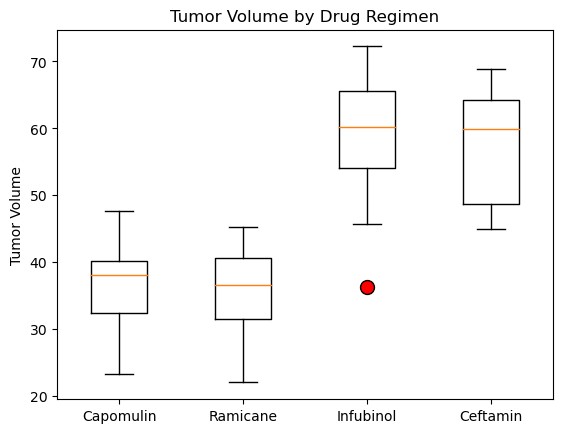

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot(drug_values,labels = drugs, flierprops= red_dot)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots

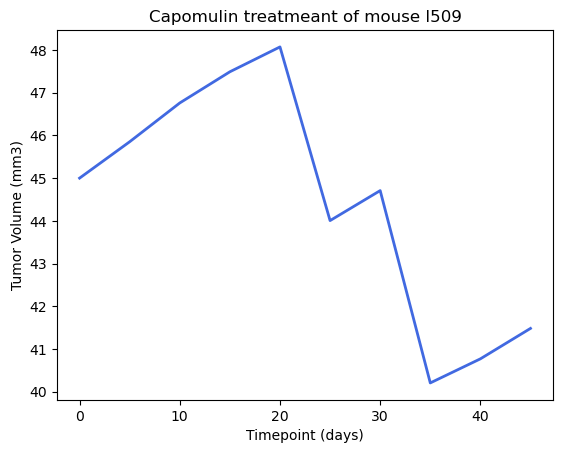

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = dropping_duplicates.loc[dropping_duplicates["Drug Regimen"] == "Capomulin",:]

forline = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
forline.head()
x_axis = forline["Timepoint"]
tumorsize = forline["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumorsize,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

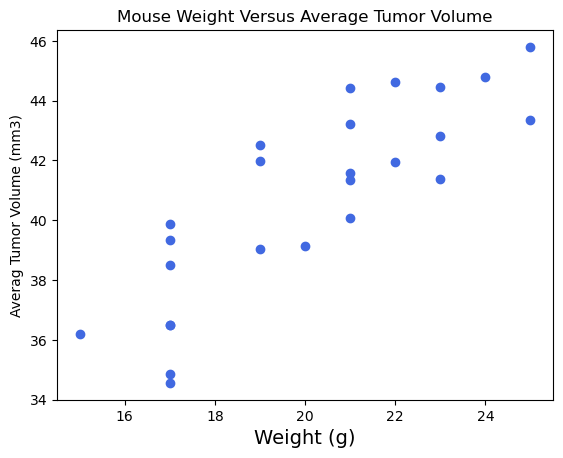

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="royalblue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


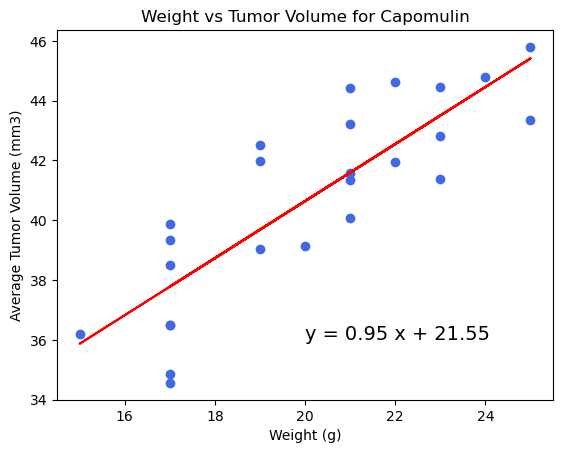

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
